# Trabalho Final

**Aluno**: Lucas de Miranda Rodrigues 

**Matrícula**: 96143

## 1. Introdução

Esse segmento encontram-se as análises dos dados, que foram tratados e ajustados previamente.

Além disso, tem como objetivo obeservar a hetegeneidade ou homogeneidade dos perfis dos funcionário, que estão sendo contratados, baseando-se nesses dados. 

## 2. Implementação

Os dados encontram-se espalhados nas bases **perfil.csv**, **linguas.csv**, **formacao.csv**, **habilidades.csv** e **experiencia_profissional.csv**. A primeira etapa do trabalho é explorar esses dados para entendê-lo. Faça o tratamento dos dados para eliminar ruídos textuais, remover registros sem significado e tratar valore nulos.

Essa exploração inicial e o tratamento das bases devem ser contemplados em relatórios separados conforme listado a seguir:

* [Tratamento da base **perfil.csv**](01-tratamento-base-perfil.ipynb)
* [Tratamento da base **linguas.csv**](02-tratamento-base-linguas.ipynb)
* [Tratamento da base **formacao.csv**](03-tratamento-base-formacao.ipynb)
* [Tratamento da base **habilidades.csv**](04-tratamento-base-habilidades.ipynb)
* [Tratamento da base **experiencia.csv**](05-tratamento-base-experiencia.ipynb)

A saída dessa etapa deve gerar um novo arquivo tratado de cada base.

Note que para fazer análise, talvez seja interessante a junção das bases tratada. Essa junção pode ser feita no próprio arquivo da análise de dados de acordo com sua necessecidade.

In [1]:
# imports das bibliotecas
import numpy as np
import pandas as pd

from plotnine import *
from collections import Sequence

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# leitura das bases
perfil = pd.read_csv("bases/perfil-tratado.csv", index_col="perfil_id")
perfil_linguas = pd.read_csv("bases/perfil-linguas.csv", index_col="perfil_id")
perfil_formacao = pd.read_csv("bases/perfil-formacao.csv", index_col="perfil_id")
perfil_habilidades = pd.read_csv("bases/perfil-habilidades.csv", index_col="perfil_id")
perfil_experiencia = pd.read_csv("bases/perfil-experiencia.csv", index_col="perfil_id")

C:\Users\ADM\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## 3. Resultados

## 3.1 Distribuição de gênero na empresa

Analise as frequências dos gêneros. Você pode utilizar o [gráfico de barras](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_col.html#two-variable-bar-plot) para fazer essa visualizaação. Sempre escreva as conclusões e insights obtidos a partir das análises.

               Quantidade
genero                   
Feminino               39
Masculino              65
Não informado           7


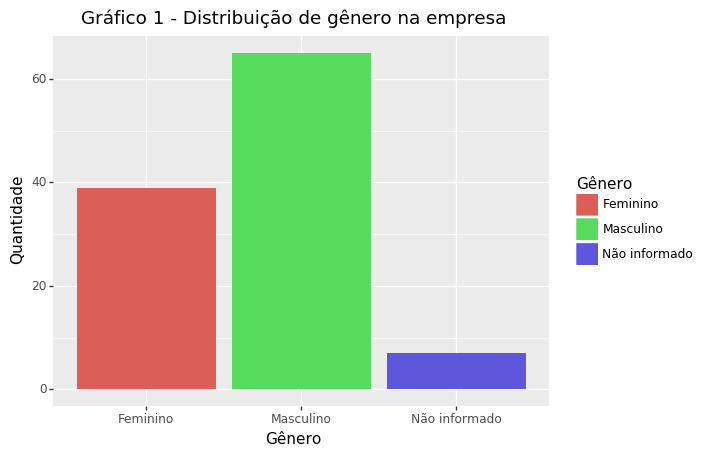

<ggplot: (12006955)>

In [2]:
g_emp=perfil
g_emp['Quantidade']=1
g_emp=g_emp.groupby('genero').sum()
print(g_emp)
g_emp['Gênero']=g_emp.index
ggplot(g_emp,aes(x='Gênero',y='Quantidade',fill='Gênero'))+ geom_col() + ggtitle('Gráfico 1 - Distribuição de gênero na empresa')

Através do Gráfico 1, pode notar que o número de empregados do gênero masculino é bem maior do que do gênero feminino. E essa diferença é de 26 empregados ou de 23,42% do total de empregados cadastrados. 

O gênero masculino é 66,67% maior que o gênero feminino. 

Também observa-se que há uma coluna de Não informado, contendo os perfis que não informaram o seu gênero. Mas pela análise desse gráfico, é possivel afirmar que há uma grande possibilidade desses perfis pertencerem ao gênero masculino.

No geral, a empresa apresenta uma distribuição heterogênea quanto ao gênero de seus empregados, predominando o gênero masculino. E mesmo considerando que todos os perfis da coluna Não informado fossem femininos, a diferença entre os gêneros estaria em 17,12% do total de empregados, mantendo ainda a predominância do gênero masculino.  

## 3.2 Distribuição de gênero por departamento

Analise a distribuição de gênero por departamento. Mostre visualmente qual a proporção entre os gênero por departamento na empresa.

Você pode utilizar o [gráfico de barras](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_col.html#two-variable-bar-plot) para fazer essa visualizaação. Sempre escreva as conclusões e insights obtidos a partir das análises.

                                           Quantidade
genero        departamento                           
Feminino      Administrativo                        6
              Comercial                            16
              Desenvolvedor / Programador           5
              Design / Arte                         2
              Financeiro                            5
              Recursos Humanos                      5
Masculino     Administrativo                       17
              Comercial                            20
              Desenvolvedor / Programador           9
              Design / Arte                         1
              Engenharia                            4
              Financeiro                            3
              Não informado                         1
              Recursos Humanos                      4
              TI                                    6
Não informado Administrativo                        2
              Comercial     

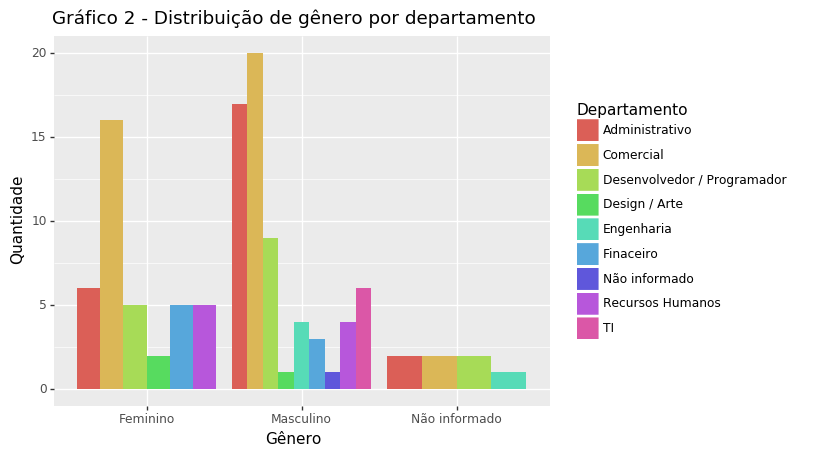

<ggplot: (-9223372036842539569)>

In [3]:
g_dep=pd.merge(perfil_experiencia,perfil,how='outer', on=['perfil_id'])
g_dep=g_dep.drop(['cargo_atual','data_admissao','tempo_empresa_meses_trojan','tempo_mercado_meses','qtd_empregos'],axis=1)
g_dep.departamento.fillna('Não informado',inplace=True)
g_dep=g_dep.groupby(['genero','departamento']).count()
print(g_dep)
g_dep['Departamento']=['Administrativo','Comercial','Desenvolvedor / Programador','Design / Arte', 'Finaceiro','Recursos Humanos',\
                      'Administrativo','Comercial','Desenvolvedor / Programador','Design / Arte', 'Engenharia','Finaceiro','Não informado','Recursos Humanos','TI',\
                      'Administrativo','Comercial','Desenvolvedor / Programador','Engenharia']
g_dep['Gênero']=['Feminino','Feminino','Feminino','Feminino','Feminino','Feminino',\
                'Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino',\
                'Não informado','Não informado','Não informado','Não informado']

(ggplot(g_dep, aes(x='Gênero', y='Quantidade', fill='Departamento'))
 + geom_bar(stat='identity', position='dodge') + ggtitle('Gráfico 2 - Distribuição de gênero por departamento'))

Com o Gráfico 2, obeserva-se que os empregados homens acupam uma variedade maior de departamentos do que as mulheres. Ou seja, empregados do gênero feminio ocupam 6 departamentos, enquanto do gênero masculino 8 departamentos, desconsiderando os dados não informados. 

Outro ponto interessante a observar é que o departamento Administartivo, Comercial e de Desenvolvedor/Programador possuem mais homens que mulheres, enquanto os departamentos de Recursos Humanos, Financeiro e Design/Arte ocorre o contrário.

A diferença mais discrepante entre homens e mulheres encontra-se no setor Adiminsitrativo com uma diferença de 15 empregados ou 
13,51% dos perfis cadastrados. A menor diferença entre os gêneros encontra-se no setor de Recursos Humanos e no Design/Arte, com a variação de 1 empregado ou menos de 1% dos perfis cadastrados.

No restante dos despartamentos, a variação entre gêneros encontra-se de 2 a 4 funcionários.

A coluna com o gênero Não informado, pode-se afirmar que há uma maior possibilidade de representar o gênero masculino, pois todos os setores ali representados tem uma maior quantidade de homens do que de mulheres, com base na análise dos graficos.

Portanto, o departamento que possui mais homens que mullheres é o Adminsitrativo. E o que possui  mais mulheres que homens é o Financeiro, com dois emregados a mais. 

Outra conclusão é que não existem empregadas mulheres atuando no departamento de Engenharia e de TI da empresa. 

## 3.3 Multidisciplinaridade do corpo funcional

Analise a distribuição da formação dos funcionários da empresa.

                           Quantidade
area                                 
Comunicação / Publicidade          23
Design / Arte                       1
Direito                             2
Economia / Finanças                10
Engenharia                         19
Gestão / Negócios                  24
Idioma                              1
Psicologia                          3
TI                                 28


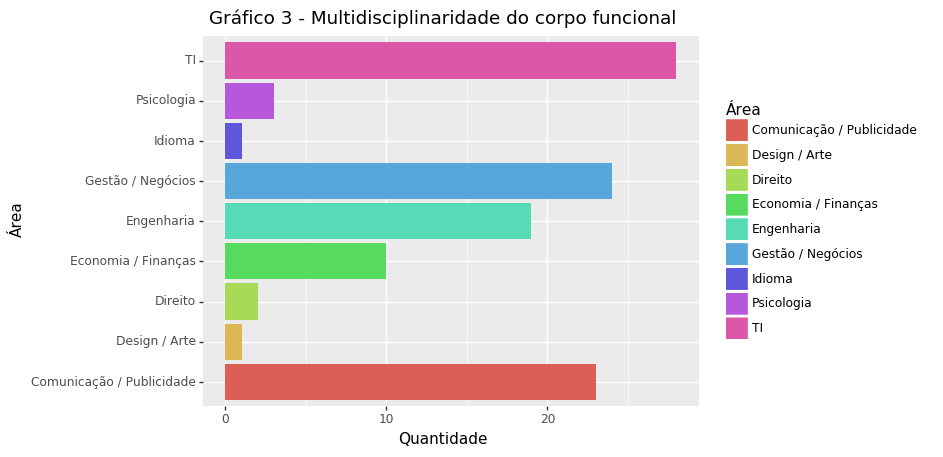

<ggplot: (-9223372036842768738)>

In [4]:
m_cf=perfil_formacao.groupby('area').count()
m_cf=m_cf.drop(['duracao','escolaridade'],axis=1)
m_cf=m_cf.rename(columns={'escolaridade_numero':'Quantidade'})
print(m_cf)
m_cf['Área']=m_cf.index
(ggplot(m_cf, aes(x='Área', y='Quantidade', fill='Área'))
 + geom_bar(stat='identity', position='dodge')
 + coord_flip()
 + ggtitle('Gráfico 3 - Multidisciplinaridade do corpo funcional'))   

O Gráfico 3 demsonstra que as cinco áreas disciplinares no corpo funcional mais relevantes são: TI, Gestão/Negócios, Comunicação/Pucbliciadade, Engenharia e Economia/Finanças. E dessas, a que está em maior quantidade é a de TI, representando 25,23% da quantidade total das áreas por perfis cadastrados.

A área de Design/Arte e Idioma são as áreas com a menor representatividade na empresa com apenas 1 empregado cada, representando menos de 1% da quantidade total de áreas por perfis cadastrados cada uma. Logo em seguida vem Direito e Psicologia. Essa menor quantidade dessas áreas podem ser juntificados pelo ramo de negócios que a empresa atua, focando-se mais nas áreas de TI, Adminstrativas e Comercial.

## 3.4 Diferenças na formação acadêmica por gênero

Analise a diferenças na formação acadêmica por gênero.

                                         Quantidade
genero        area                                 
Feminino      Comunicação / Publicidade          11
              Design / Arte                       1
              Direito                             1
              Economia / Finanças                 4
              Engenharia                          4
              Gestão / Negócios                  11
              Psicologia                          1
              TI                                  6
Masculino     Comunicação / Publicidade          10
              Direito                             1
              Economia / Finanças                 5
              Engenharia                         14
              Gestão / Negócios                  12
              Idioma                              1
              Psicologia                          2
              TI                                 20
Não informado Comunicação / Publicidade           2
            

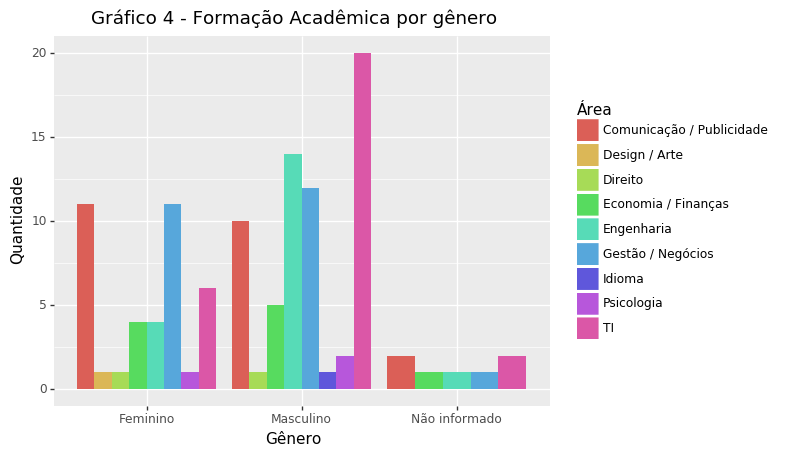

<ggplot: (-9223372036842539548)>

In [5]:
g_for=pd.merge(perfil_formacao,perfil,how='outer',on=['perfil_id'])
g_for=g_for.drop(['escolaridade_numero','duracao','escolaridade'],axis=1)
g_for=g_for.groupby(['genero','area']).count()
print(g_for)
g_for['Área']=['Comunicação / Publicidade','Design / Arte','Direito','Economia / Finanças','Engenharia','Gestão / Negócios','Psicologia','TI',\
              'Comunicação / Publicidade','Direito','Economia / Finanças','Engenharia','Gestão / Negócios','Idioma','Psicologia','TI',\
              'Comunicação / Publicidade','Economia / Finanças','Engenharia','Gestão / Negócios','TI']
g_for['Gênero']=['Feminino','Feminino','Feminino','Feminino','Feminino','Feminino','Feminino','Feminino',\
                'Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino',\
                'Não informado','Não informado','Não informado','Não informado','Não informado']

(ggplot(g_for, aes(x='Gênero', y='Quantidade', fill='Área'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('Gráfico 4 - Formação Acadêmica por gênero'))

Percebe-se, com o Gráfico 4, que no gênero feminio as principais formações são as áreas de  Comunicação/Puclicidade e Gestão/Negócios, ambas com 9,91% das formações dos perfis cadastrados. E a principal formação do gênero masculino é a área de TI com 18,02% das formações dos perfis cadastrados.

Observa-se também que a única área de formação, possuindo mais mulhures que homens é a Comunicação/Publicidade com uma diferença de 1 empregado entre os gêneros. 

As áreas de TI e de Engenharia possuem mais homens que mulheres, possuindo um diferença, respectivamente, de 14 e 10 empregados. E isso significa 12,61% e 9,01% das formações dos perfis cadastrados.

Nota-se que o gênero masculino tem maior participação nas áreas de TI, Engenharia, Gestão/Negócios e Comunicação/Puclicidade. Já o gênero feminino as áreas de Comunicação/Puclicidade, Gestão/Negócios e TI. 

Nenhum homem cursou a área de Desing/Arte e nenhuma mulher cursou a área de Idioma.

Apenas um homem e uma mullher cursaram Direito.

A mesma quantidade de mulheres que se formaram em Economia/Finanças é a mesma que se formaram em Enegenharia.

A diferença entre gêneros que se formaram em Psicologia é de apenas 1 funcionário.

Na coluna de gênero Não informado, a única área que tem a maior possibilidade de ser cursada por mulheres é a Comunicação/Puclicidade e o resto por homens.




## 3.5 Multidisciplinaridade nos departamentos

Mostre o perfil acadêmico nos diferentes setores/departamentos da empresa.

                                                       Quantidade
departamento                area                                 
Administrativo              Comunicação / Publicidade           5
                            Economia / Finanças                 4
                            Engenharia                          3
                            Gestão / Negócios                   8
                            Psicologia                          1
                            TI                                  4
Comercial                   Comunicação / Publicidade          15
                            Economia / Finanças                 3
                            Engenharia                          7
                            Gestão / Negócios                  11
                            TI                                  2
Desenvolvedor / Programador Engenharia                          5
                            TI                                 11
Design / A

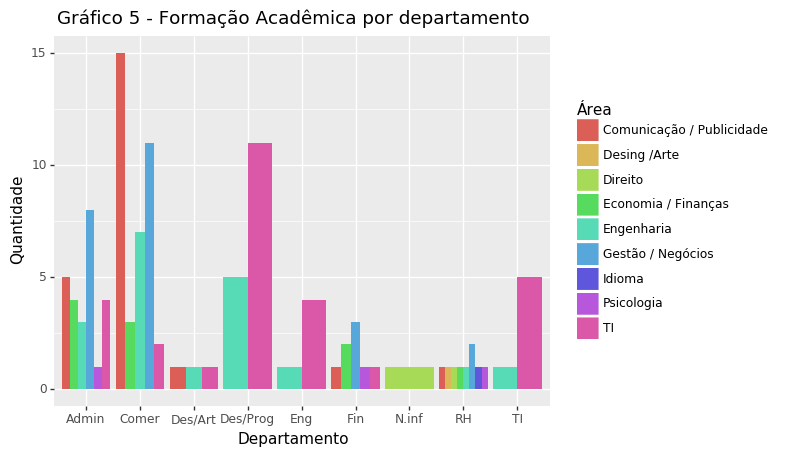

<ggplot: (-9223372036842336838)>

In [6]:
m_dep=pd.merge(perfil_experiencia,perfil_formacao,how='outer',on=['perfil_id'])
m_dep['Quantidade']=1
m_dep=m_dep.drop(['cargo_atual','data_admissao','tempo_empresa_meses_trojan','tempo_mercado_meses','qtd_empregos','escolaridade_numero','duracao','escolaridade'],axis=1)
m_dep.departamento.fillna('Não informado',inplace=True)
m_dep=m_dep.groupby(['departamento','area']).count()
print(m_dep)
m_dep['Departamento']=['Admin','Admin','Admin','Admin','Admin','Admin',\
                      'Comer','Comer','Comer','Comer','Comer',\
                      'Des/Prog','Des/Prog',\
                      'Des/Art','Des/Art','Des/Art',\
                      'Eng','Eng',\
                      'Fin','Fin','Fin','Fin','Fin',\
                      'N.inf',
                      'RH','RH','RH','RH','RH','RH','RH','RH',\
                      'TI','TI']
m_dep['Área']=['Comunicação / Publicidade','Economia / Finanças','Engenharia','Gestão / Negócios','Psicologia','TI',\
              'Comunicação / Publicidade','Economia / Finanças','Engenharia','Gestão / Negócios','TI',\
              'Engenharia','TI',\
              'Comunicação / Publicidade','Engenharia','TI',\
              'Engenharia','TI',\
              'Comunicação / Publicidade','Economia / Finanças','Gestão / Negócios','Psicologia','TI',\
              'Direito',\
              'Comunicação / Publicidade','Desing /Arte','Direito','Economia / Finanças','Engenharia','Gestão / Negócios','Idioma','Psicologia',\
              'Engenharia','TI']

(ggplot(m_dep, aes(x='Departamento', y='Quantidade', fill='Área'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('Gráfico 5 - Formação Acadêmica por departamento'))

No Gráfico 5, o departamento de Recursos Humanos abrange uma maior quantidade de áreas de formação do que os demais departamentos. Porém, essas áreas estão em menores quantidades do que em outros departamentos.

Os departamentos de TI, Desenvolvedor/Programador e Engenharia tem em comum em abranger apenas duas áreas de formação, que são a de TI e de Engenharia. Mas a concentração é maior na área de TI. 

O deparatamento Adminsitraitivo abrange 6 áreas. E a de maior concentração é a área de Gestão/Negócios. 

O departamento Comercial  e o Finaceiro abrangem 5 áreas cada, mas tendo em destaque a área, respectivamente, de Comunicação/Publicidade e de Gestão/Negócios.

O departamento de Design/Arte tem apenas 3 áreas e todos tem a mesmas quantidade de empregados. 

No geral, observa-se uma dstribuição de área de formação heterogênea entre os departamentos. E uma concentração maior de funcionários nos seguintes departamentos: Comercial, Administrativo e Desenvolvedor /Programador. 

## 3.6 Escolaridade na empresa e nos departamentos


               Quantidade
escolaridade             
Graduação              63
Pós-Graduação          47
Técnico                 1


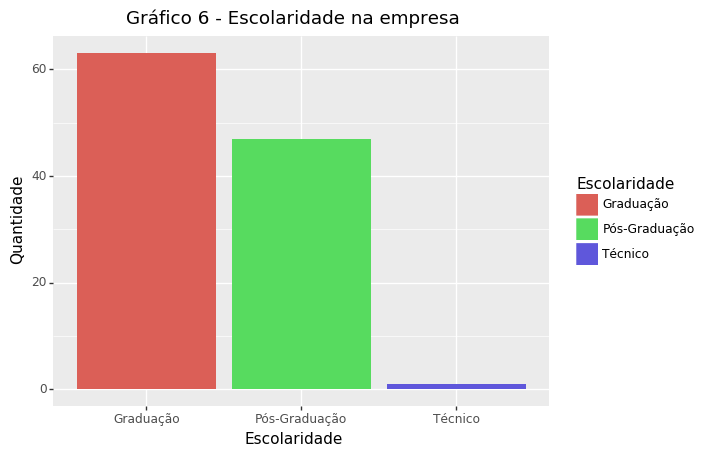

<ggplot: (12216268)>

In [7]:
esc=perfil_formacao
esc['Quantidade']=1
esc=esc.drop(['escolaridade_numero','area','duracao'],axis=1)
esc=esc.groupby('escolaridade').count()
print(esc)
esc['Escolaridade']=esc.index

ggplot(esc,aes(x='Escolaridade',y='Quantidade',fill='Escolaridade'))+ geom_col() + ggtitle('Gráfico 6 - Escolaridade na empresa')

O Gráfico 6 demonstra que 63 funcionários ou 56,76% dos perfis cadastrados tem um título de Graduação. Ou seja, mais da metade dos funcionários da empresa tem graduação. 

Além disso, os que possuem um título de Pós-Graduação correspode a 42,34% dos perfis cadastrados. E os que possuem o ensino técnico menos de 1%.

A diferença entre graduação e pós-graduação é de 14,42% dos perfis cadastrados e o número de funcionários com graduação é 34,15% maior que o número funcionarios de pós-graduação.

                                           Quantidade
escolaridade  departamento                           
Graduação     Administrativo                       12
              Comercial                            22
              Desenvolvedor / Programador          13
              Design / Arte                         2
              Engenharia                            1
              Financeiro                            4
              Não informado                         1
              Recursos Humanos                      5
              TI                                    3
Pós-Graduação Administrativo                       13
              Comercial                            16
              Desenvolvedor / Programador           3
              Design / Arte                         1
              Engenharia                            4
              Financeiro                            4
              Recursos Humanos                      4
              TI            

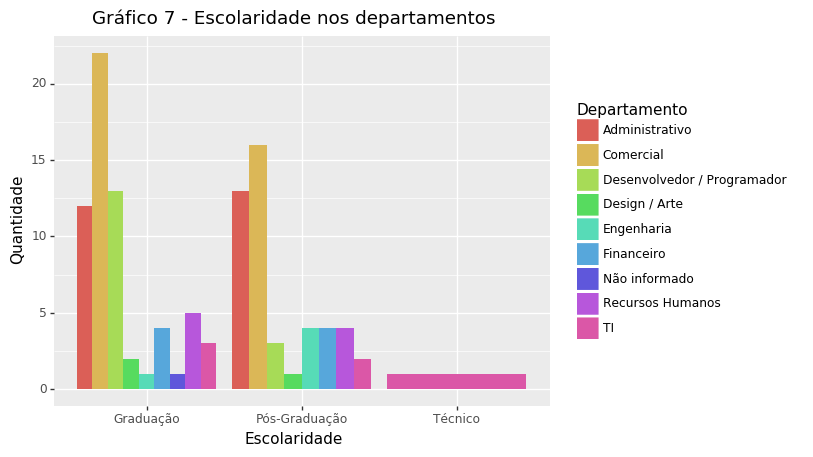

<ggplot: (-9223372036842553831)>

In [8]:
e_dep=pd.merge(perfil_experiencia,perfil_formacao,how='outer',on=['perfil_id'])
e_dep=e_dep.drop(['cargo_atual','data_admissao','tempo_empresa_meses_trojan','tempo_mercado_meses','qtd_empregos','escolaridade_numero','duracao','area'],axis=1)
e_dep.departamento.fillna('Não informado',inplace=True)
e_dep=e_dep.groupby(['escolaridade','departamento']).count()
print(e_dep)
e_dep['Escolaridade']=['Graduação','Graduação','Graduação','Graduação','Graduação','Graduação','Graduação','Graduação','Graduação',\
                      'Pós-Graduação','Pós-Graduação','Pós-Graduação','Pós-Graduação','Pós-Graduação','Pós-Graduação','Pós-Graduação','Pós-Graduação',\
                      'Técnico']
e_dep['Departamento']=['Administrativo','Comercial','Desenvolvedor / Programador','Design / Arte','Engenharia','Financeiro','Não informado','Recursos Humanos','TI',\
                      'Administrativo','Comercial','Desenvolvedor / Programador','Design / Arte','Engenharia','Financeiro','Recursos Humanos','TI',\
                      'TI']

(ggplot(e_dep, aes(x='Escolaridade', y='Quantidade', fill='Departamento'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('Gráfico 7 - Escolaridade nos departamentos'))

Percebe-se, com o Gráfico 7, que o departamento Comercial tem mais funcionários com títilos de gradução, correspondendo a 19,82% dos perfis cadastrados, e de pós-graduação, com 14,41%.

O setor Adminstrativo,Financeiro, Recursos Humanos, TI e Design/Arte  tem um comportamento mais homegêneo (com menor diferença) na quantidade de funcionários com título de graduação e pós-graduação.

O setor que apresenta um grande diferença de títulos é a Desenvolvedor/Programador. E essa é diferença é de 10 funcionários.

O setor de Engenharia tem mais funcionário com título de pós graudação que com graduação, apresentando uma variação de 3 funcionários.

O único departamento que possui um título de técnico é o de TI.

O gráfico 7 apresenta uma desproporcionalidade,pois o departamento Administrativo, Comercial e Desenvolvedor/Programador tem mais funcionários possuindo títulos de graduação que os demais departamentos. Quanto as pessoas com o título de pós-graduação os departamentos de Administração e Comercial concentra-se uma maior quantidade que os demais.

Essa análise colabora para as afirmativas feitas na análise da Figura 5.

## 3.7 Idiomas e Multinacionalidade

Mostre a distribuição de línguas dominadas pelos funcionários.


      Idioma  Quantidade
0  Português        67.0
1     Inglês        85.0
2   Espanhol        39.0
Total de perfis: 90


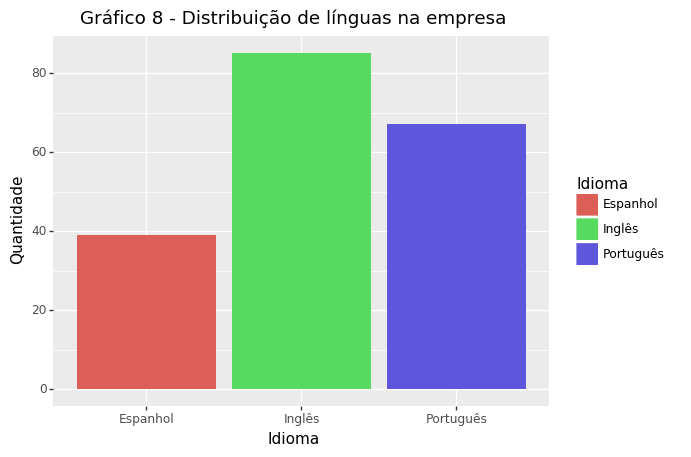

<ggplot: (-9223372036842326854)>

In [9]:
i_m=pd.DataFrame(['Português','Inglês','Espanhol'],columns=['Idioma'])
i_m.loc[0,'Quantidade']=perfil_linguas.fala_portugues.sum()
i_m.loc[1,'Quantidade']=perfil_linguas.fala_ingles.sum()
i_m.loc[2,'Quantidade']=perfil_linguas.fala_espanhol.sum()
print(i_m)
print('Total de perfis:',len(perfil_linguas.index))

ggplot(i_m,aes(x='Idioma',y='Quantidade',fill='Idioma'))+ geom_col() + ggtitle('Gráfico 8 - Distribuição de línguas na empresa')

No gráfico 8, 94,44% dos perfis cadastrados sabem falar em inglês, 74,44% sabem português e 43,33% espanhol. Ou seja, a grande maioria dos funcionários sabem inglês e português, mas menos da metade sabem espanhol.

Verifique como essa distribuição muda entre os generos, setores e tipo de cargos da empresa.

In [10]:
i_g=pd.merge(perfil,perfil_linguas,how='right',on=['perfil_id'])
i_g=i_g.drop(['Quantidade','qtd_linguas'],axis=1)
i_g.fillna('Não informado',inplace=True)
i_g=i_g.groupby('genero').sum()
i_g=i_g.rename(columns={'fala_portugues':'Português','fala_ingles':'Inglês','fala_espanhol':'Espanhol'})

               Português  Inglês  Espanhol
genero                                    
Feminino            19.0    26.0      14.0
Masculino           43.0    53.0      21.0
Não informado        5.0     6.0       4.0


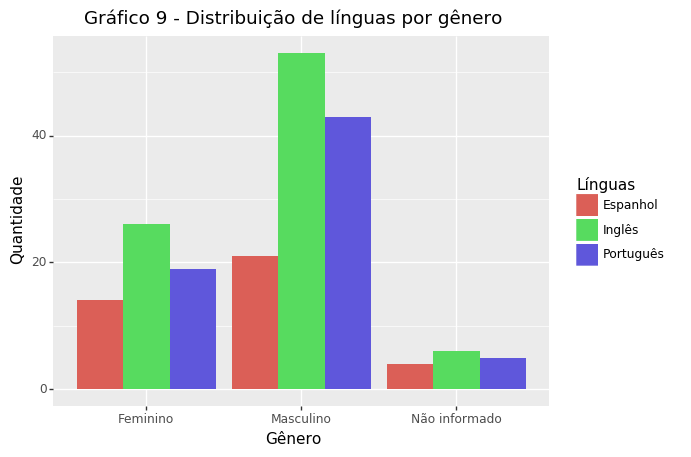

<ggplot: (-9223372036842135145)>

In [11]:
i_gen=pd.DataFrame({'Gênero':['Feminino','Feminino','Feminino','Masculino','Masculino','Masculino','Não informado','Não informado','Não informado'],
                  'Línguas':['Português','Inglês','Espanhol','Português','Inglês','Espanhol','Português','Inglês','Espanhol']})
i_gen['Quantidade']=0
i_gen.loc[0,'Quantidade']=i_g.loc['Feminino','Português']
i_gen.loc[1,'Quantidade']=i_g.loc['Feminino','Inglês']
i_gen.loc[2,'Quantidade']=i_g.loc['Feminino','Espanhol']
i_gen.loc[3,'Quantidade']=i_g.loc['Masculino','Português']
i_gen.loc[4,'Quantidade']=i_g.loc['Masculino','Inglês']
i_gen.loc[5,'Quantidade']=i_g.loc['Masculino','Espanhol']
i_gen.loc[6,'Quantidade']=i_g.loc['Não informado','Português']
i_gen.loc[7,'Quantidade']=i_g.loc['Não informado','Inglês']
i_gen.loc[8,'Quantidade']=i_g.loc['Não informado','Espanhol']
print(i_g)

(ggplot(i_gen, aes(x='Gênero', y='Quantidade', fill='Línguas'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('Gráfico 9 - Distribuição de línguas por gênero'))

Funcionários do gênero masculino falam  mais inglês, português e espanhol que funcionários do gênero feminino, de acordo com o Gráfico 9.

Mas deve lembrar que a distribuição de homens e mulheres não é homegênea, segundo o Grafico 1. E isso justifica tal diferença analisada.

O gênero Não informado tem mais probalidade de percetecerem ao gênero masculino, pois ess útlimo tem maior quantidade de pessoas que falam todas as líguas aqui avaliadas. 

In [12]:
i_dep=pd.merge(perfil_experiencia,perfil_linguas,how='right',on=['perfil_id'])
i_dep=i_dep.drop(['cargo_atual','data_admissao','tempo_empresa_meses_trojan','tempo_mercado_meses','qtd_linguas','qtd_empregos'],axis=1)
i_dep=i_dep.groupby('departamento').sum()
i_dep=i_dep.rename(columns={'fala_portugues':'Português','fala_ingles':'Inglês','fala_espanhol':'Espanhol'})

                             Português  Inglês  Espanhol
departamento                                            
Administrativo                    11.0    17.0      11.0
Comercial                         24.0    30.0      14.0
Desenvolvedor / Programador       10.0    13.0       1.0
Design / Arte                      2.0     2.0       1.0
Engenharia                         3.0     3.0       1.0
Financeiro                         6.0     5.0       5.0
Recursos Humanos                   6.0     9.0       4.0
TI                                 5.0     6.0       2.0


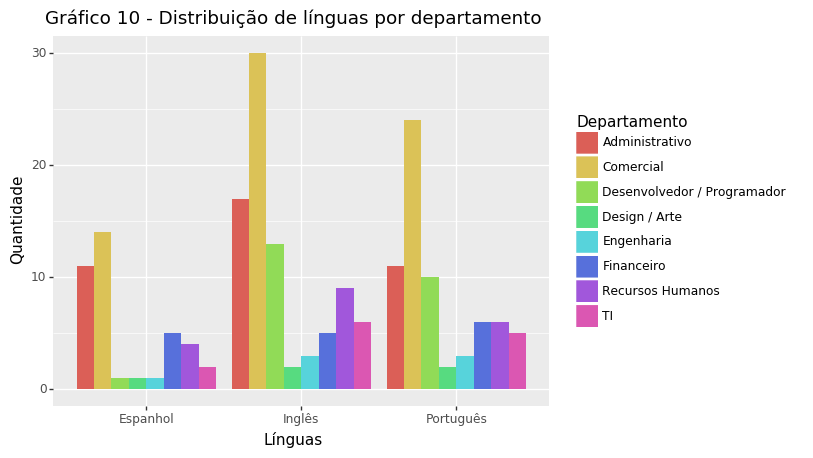

<ggplot: (12405042)>

In [13]:
i_d=pd.DataFrame({'Departamento':['Administrativo','Administrativo','Administrativo',\
                                 'Comercial','Comercial','Comercial',\
                                 'Desenvolvedor / Programador','Desenvolvedor / Programador','Desenvolvedor / Programador',\
                                 'Design / Arte','Design / Arte','Design / Arte',\
                                 'Engenharia','Engenharia','Engenharia',\
                                 'Financeiro','Financeiro','Financeiro',\
                                 'Recursos Humanos','Recursos Humanos','Recursos Humanos',\
                                 'TI','TI','TI'],
                 'Línguas':['Português','Inglês','Espanhol',\
                           'Português','Inglês','Espanhol',\
                           'Português','Inglês','Espanhol',\
                           'Português','Inglês','Espanhol',\
                           'Português','Inglês','Espanhol',\
                           'Português','Inglês','Espanhol',\
                           'Português','Inglês','Espanhol',\
                           'Português','Inglês','Espanhol']})
i_d['Quantidade']=0
i=0
v1=i_dep.index
v2=i_dep.columns
for x in v1:
    for y in v2:
        i_d.loc[i,'Quantidade']=i_dep.loc[x,y]
        i+=1
print(i_dep)

(ggplot(i_d, aes(x='Línguas', y='Quantidade', fill='Departamento'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('Gráfico 10 - Distribuição de línguas por departamento'))    

Através do Gráfico 10, o departamento Comercial é que o possui mais funcionários falando as três línguas. Logo em seguida é o departamento Administrativo.

Os departamentos de Engenharia, Financeiro e Design/Arte apresenta um comportamentos mais homogêneo na distribuição de línguas.

O depertamento Desenvolvedor/Programador apresenta apenas 1 funcionário falando espanhol, enquanto os que falam inglês e português correspondem, respectivamente, em 13 e 10 funcionários. 

No geral, todos os departamentos tem mais quantidade de funcionários que sabem falar inglês, seguido dos que sabem falar português e por último espanhol.

## 3.8 Expertise dos funcionários

Análises referentes as tempo de experiência e skills dos funcionários.

                 Análise Descritiva
       tempo_empresa_meses_trojan  tempo_mercado_meses
count                  110.000000           110.000000
mean                    15.290909            71.254545
std                     14.825805            51.093445
min                      1.000000             6.000000
25%                      6.000000            33.000000
50%                     11.000000            55.000000
75%                     18.000000            94.000000
max                     80.000000           260.000000


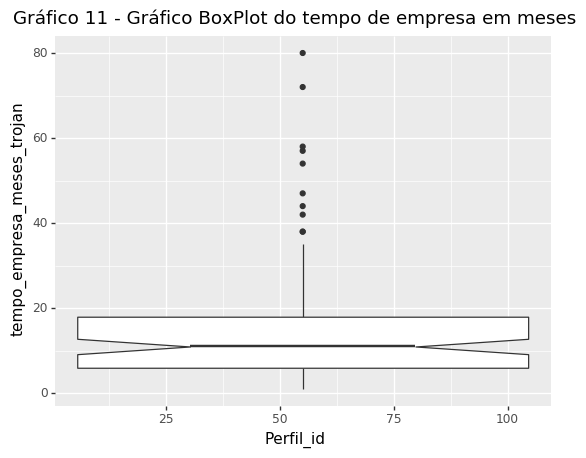

<ggplot: (-9223372036842131666)>

In [14]:
exp=perfil_experiencia
exp=exp.drop(['cargo_atual','data_admissao','departamento','qtd_empregos'],axis=1)
print('                 Análise Descritiva')
print(exp.describe(include='all'))
exp['Perfil_id']=exp.index

(ggplot(exp, aes(x='Perfil_id',y='tempo_empresa_meses_trojan'))
        + geom_boxplot(notch=True)
        + ggtitle('Gráfico 11 - Gráfico BoxPlot do tempo de empresa em meses'))

Com o Gráfico 11, percebe-se que há 9 outliers e que o tempo de empresa mediano é de aproximadamente 11 meses.

A média de tempo de empresa corresponde a 15,29 meses, que é um pouco maior que a mediana encontrada.

Outra análise que pode ser feita é que aproximadamente 50% dos perfis tem o tempo de empresa entre 6 e 18 meses.

Além disso, nota-se que a distribuição do tempo de empresa é assimétrica, pois as distâncias dos quartis até a mediana não são parecidos.


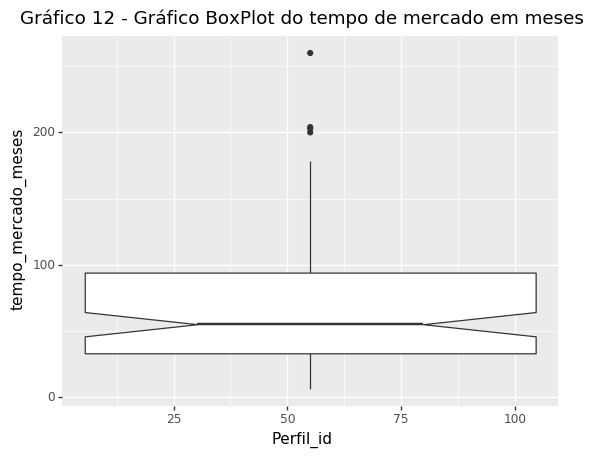

<ggplot: (-9223372036842748910)>

In [15]:
(ggplot(exp, aes(x='Perfil_id',y='tempo_mercado_meses'))
        + geom_boxplot(notch=True)
        + ggtitle('Gráfico 12 - Gráfico BoxPlot do tempo de mercado em meses'))

Através do Gráfico 12, percebe-se que há 3 outliers e que o tempo de mercado mediano é de aproximadamente 55 meses.

A média de tempo de mercado corresponde a 71,25 meses, que é um bem maior que a mediana encontrada.

Outra análise que pode ser feita é que aproximadamente 50% dos perfis tem o tempo de mercado entre 33 e 94 meses.

Além disso, nota-se que a distribuição do tempo de empresa é assimétrica, pois as distâncias dos quartis até a mediana não são parecidos.

                          Quantidade
agrupamento                         
Comportamento / Social            49
Design / Artes                    38
Direito                            1
Educação                           3
Empreendedorismo                  35
Engenharia                        23
Gestão / Administração           366
História / Turismo                 3
Idiomas                           39
Informática / Softwares          491
Linguagem de Programação         244
Negócios / Marketing             605
Oratória / Escrita                11
TI / Desenvolvedor               268


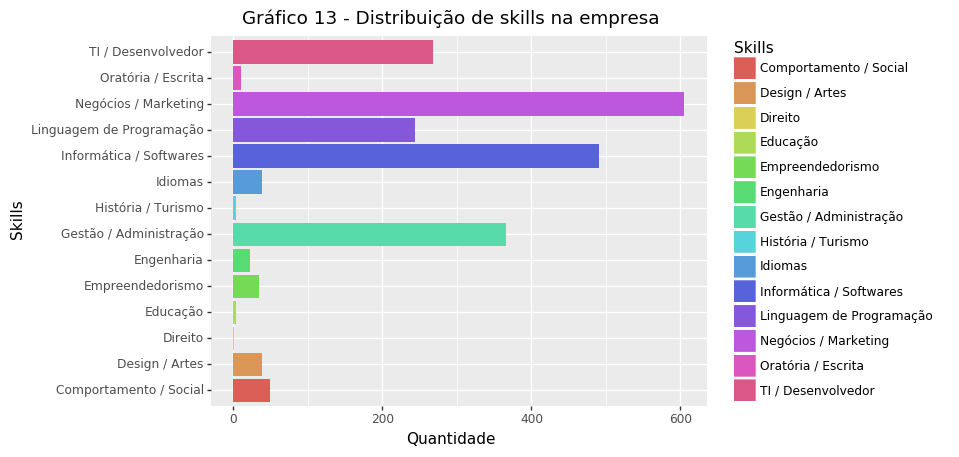

<ggplot: (-9223372036841380359)>

In [16]:
habilidades_tratado = pd.read_csv("bases/habilidades-tratado.csv", index_col="perfil_id")
habilidades_tratado['Quantidade']=1
habilidades_tratado=habilidades_tratado.drop(['endorsement_count','name'],axis=1)
habilidades_tratado=habilidades_tratado.groupby('agrupamento').sum()
print(habilidades_tratado)
habilidades_tratado['Skills']=habilidades_tratado.index

(ggplot(habilidades_tratado,aes(x='Skills',y='Quantidade',fill='Skills'))
   + geom_col()
   + coord_flip()
   + ggtitle('Gráfico 13 - Distribuição de skills na empresa'))

As pincipais habilidades que se destacam, em ordem descrescente, são:Negócios/Marketing, Informática/Software, Gestão/Administração, TI/Desenvolvedor e Linguagem de Programação.

As principais habilidades que não se destacam, em ordem crescente,são: Direito, História/Turismo e Educação.

Nota-se que as habilidades relacionadas diretamente com o ramo de negócio da empresa estão em maiores quantidades do que aquelas que não estão.

## 3.10 Análises Adssionais

Faça análises que julgar necessário para refutar ou corraborar a hipotése de Aquiles.

                             Quantidade
genero        escolaridade             
Feminino      Graduação              25
              Pós-Graduação          14
Masculino     Graduação              34
              Pós-Graduação          30
              Técnico                 1
Não informado Graduação               4
              Pós-Graduação           3


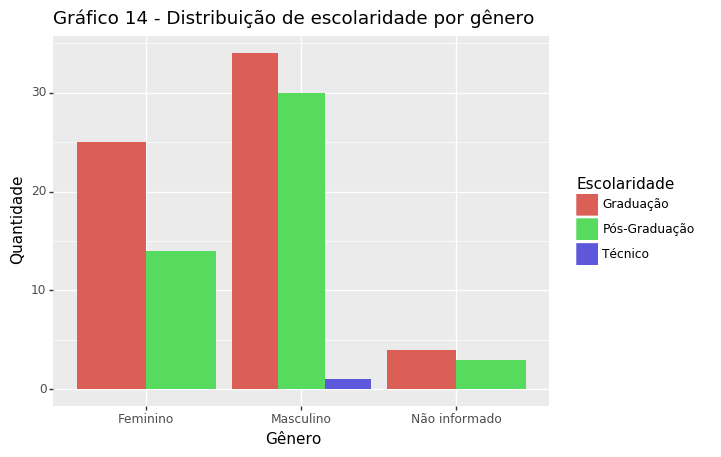

<ggplot: (-9223372036841569774)>

In [17]:
g_for=pd.merge(perfil_formacao,perfil,how='outer',on=['perfil_id'])
g_for=g_for.drop(['escolaridade_numero','area','duracao'],axis=1)
g_for=g_for.groupby(['genero','escolaridade']).count()
g_for=g_for.drop(['Quantidade_y'],axis=1)
g_for=g_for.rename(columns={'Quantidade_x':'Quantidade'})
print(g_for)
g_for['Gênero']=['Feminino','Feminino','Masculino','Masculino','Masculino','Não informado','Não informado']
g_for['Escolaridade']=['Graduação','Pós-Graduação','Graduação','Pós-Graduação','Técnico','Graduação','Pós-Graduação']

(ggplot(g_for, aes(x='Gênero', y='Quantidade', fill='Escolaridade'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('Gráfico 14 - Distribuição de escolaridade por gênero'))

O gênero masculino com graduação corresponde a 30,63% dos perfis cadastrados. Enquanto o gênero feminino a 22,52%, exitindo uma diferença de 8,11% do total de dados analisados, segundo o Gráfico 14.

Outra análise que pode ser feita é que o gênero masculino com pós-graduação corresponde a 27,03% dos perfis cadastrados. Enquanto o gênero feminino a 12,61%, existindo uma diferença de 14,42% do total de dados analisados. Essa diferença é maior que a diferença observada entre os gêneros com graduação, sendo 77,80% maior.

Nota-se também que o unico gênero com o título de técnico é o masculino.

No geral, ainda se mantem a predominância do título de graduação sobre os demais, conforme analisado no Gráfico 6. E coluna Não informado tem uma grande probabilidade de corresponder ao gênero masculino.

                 Análise Descritiva
       qtd_empregos
count    110.000000
mean       4.281818
std        1.158390
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


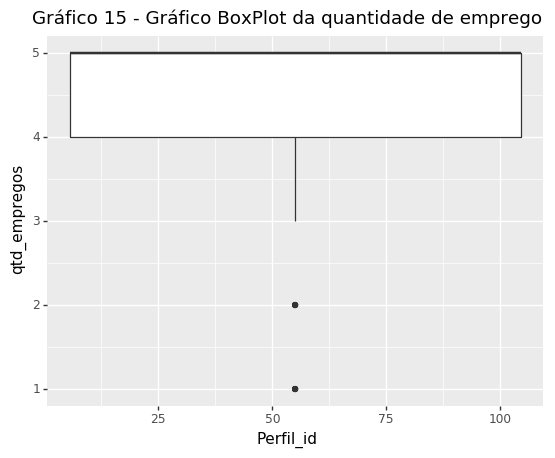

<ggplot: (-9223372036841608567)>

In [18]:
qtd_emp=perfil_experiencia
qtd_emp=qtd_emp.drop(['cargo_atual','data_admissao','departamento','tempo_empresa_meses_trojan','tempo_mercado_meses'],axis=1)
print('                 Análise Descritiva')
print(qtd_emp.describe(include='all'))
qtd_emp['Perfil_id']=qtd_emp.index
(ggplot(qtd_emp, aes(x='Perfil_id',y='qtd_empregos'))
        + geom_boxplot(notch=False)
        + ggtitle('Gráfico 15 - Gráfico BoxPlot da quantidade de emprego'))

Através do Gráfico 15, percebe-se que há 2 outliers e que a quantidade mediana de emprego é de 5.

A média da quantaidade de emprego corresponde a 4,28, que é um pouco menor que a mediana encontrada.

Outra análise que pode ser feita é que aproximadamente 50% dos perfis tem a quantidade de emprego entre 4 e 5.

Além disso, nota-se que a distribuição da quantidade de emprego é assimétrica, pois as distâncias dos quartis até a mediana não são parecidos.

                             Quantidade
genero        data_admissao            
Feminino      2014-08-01              1
              2015-03-01              1
              2016-03-01              1
              2016-07-01              2
              2016-08-01              1
              2016-10-01              5
              2016-11-01              1
              2016-12-01              2
              2017-01-01              6
              2017-02-01              2
              2017-03-01              5
              2017-05-01              1
              2017-06-01              2
              2017-07-01              4
              2017-08-01              3
              2017-09-01              2
Masculino     2011-09-01              1
              2012-12-01              1
              2013-10-01              1
              2014-04-01              1
              2015-03-01              2
              2015-08-01              1
              2016-01-01              1


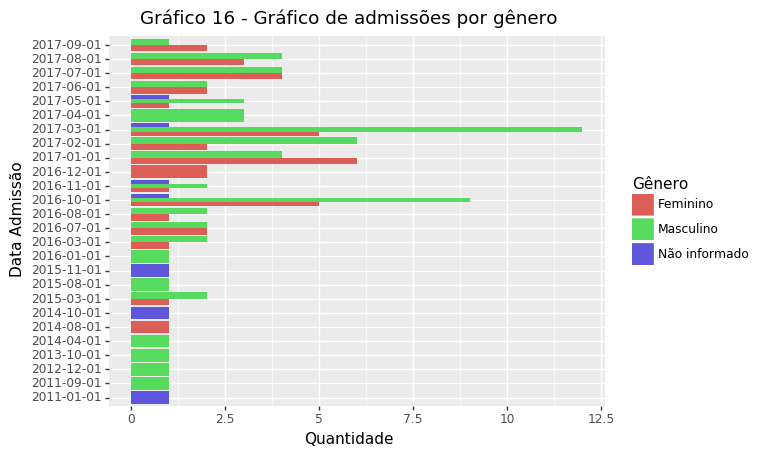

<ggplot: (-9223372036841576160)>

In [19]:
da_g=pd.merge(perfil,perfil_experiencia,how='left',on=['perfil_id'])
da_g=da_g.drop(['cargo_atual','departamento','tempo_empresa_meses_trojan','tempo_mercado_meses','qtd_empregos'],axis=1)
da_g=da_g.groupby(['genero','data_admissao']).count()
print(da_g)
da_g['Gênero']=['Feminino','Feminino','Feminino','Feminino','Feminino','Feminino','Feminino','Feminino','Feminino','Feminino',\
               'Feminino','Feminino','Feminino','Feminino','Feminino','Feminino',\
               'Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino',\
               'Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino','Masculino',\
               'Masculino',\
               'Não informado','Não informado','Não informado','Não informado','Não informado','Não informado','Não informado']
da_g['Data Admissão']=['2014-08-01','2015-03-01','2016-03-01','2016-07-01','2016-08-01','2016-10-01','2016-11-01','2016-12-01','2017-01-01','2017-02-01',\
                      '2017-03-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01','2017-09-01',\
                      '2011-09-01','2012-12-01','2013-10-01','2014-04-01','2015-03-01','2015-08-01','2016-01-01','2016-03-01','2016-07-01','2016-08-01',\
                      '2016-10-01','2016-11-01','2017-01-01','2017-02-01','2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01',\
                      '2017-09-01',\
                      '2011-01-01','2014-10-01','2015-11-01','2016-10-01','2016-11-01','2017-03-01','2017-05-01']


(ggplot(da_g) + 
   aes(x='Data Admissão',y='Quantidade',fill='Gênero') +
   geom_bar(stat='identity', position='dodge') + 
   coord_flip()
  + ggtitle('Gráfico 16 - Gráfico de admissões por gênero'))

Analisando o Gráfico 16, é possivel afirmar que a partir do mês de agosto de 2014 a empresa começou a admitir mulheres, pois antes a maioria contratada era formada por homens. 

Mas mesmo diante da admissão de mulheres, observa-se que a maior parte das admissões feitas foram do gênero masculino.

## 4. Conclusão



Através dessas análises é possivel afirmar que há uma distribuição heterogênea dos perfis dos funcionários que estão sendo contratados. Pois existem:
   * Uma maior concentração de homens do que de mulheres na empresa;
   * Uma maior quantidade de perfis com título de graduação do que com título de pós-graduação e de técnico;
   * Uma maior quantia de funcionários nos departamentos de Adminsitração, Comercial e Desenvolvimento/Programação do que nos demais departamentos;
   * Uma grande fração de funcionários que sabem falar inglês e/ou português do que espanhol;
   * E uma grande quantidade de perfis formados na área de TI do que nas demais áreas.  
   

## Referências

MCKINNEY, Wes. **Python para Análise de Dados**.1 ed.São Paulo: Novatec, 2018